In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class Interpolation:
    def bilinear(self, img, scale=1.5):
        H, W = img.shape[:2]
        H_big, W_big = int(H * scale), int(W * scale)
        if len(img.shape) == 2:
            ch = 1
            output_img = np.zeros((H_big, W_big))
        elif len(img.shape) == 3:
            ch = img.shape[2]
            output_img = np.zeros((H_big, W_big, ch))
        else:
            raise ValueError("invalid image shape: {}".format(img.shape))

        for i in range(H_big):
            for j in range(W_big):
                y, x = min(H-2, int(i/scale)), min(W-2, int(j/scale))
                dy, dx = i/scale - y, j/scale - x
                D = [(1-dy)*(1-dx), dy*(1-dx), (1-dy)*dx, dy*dx]
                if len(img.shape) == 3:
                    I = [img[y, x, :], img[y+1, x, :], img[y, x+1, :], img[y+1, x+1, :]]
                    output_img[i, j, :] = sum(d*z for (d, z) in zip(D, I))
                elif len(img.shape) == 2:
                    I = [img[y, x], img[y+1, x], img[y, x+1], img[y+1, x+1]]
                    output_img[i, j] = sum(d*z for (d, z) in zip(D, I))

        output_img = np.clip(output_img, 0, 255).astype("uint8")
        return output_img

In [27]:
class Solver:
    def problem_73(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ip = Interpolation()
        output_img = ip.bilinear(img_gray, 0.5)
        output_img = ip.bilinear(output_img, 2.0)
        return output_img
    
    def problem_74(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.int32)
        img_ip = self.problem_73(img).astype(np.int32)
        img_diff = np.abs(img_gray - img_ip)
        img_diff = (img_diff / img_diff.max() * 255).astype(np.uint8)
        return img_diff
    
    def problem_75(self, img):
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ip = Interpolation()
        
        images = []
        for i in range(6):
            scale = 1.0 / (2**i)
            scaled_image = ip.bilinear(img_gray, scale)
            images.append(scaled_image)
            text = "1/{}".format(2**i)
            plt.subplot(2, 3, i+1)
            plt.imshow(scaled_image, cmap="gray")
            plt.title(text)
        plt.show()
        return images
        
    def problem_76(self, img):
        images = self.problem_75(img)
        ip = Interpolation()
        resized_images = np.zeros((6, *img.shape[:2]))
        for i in range(6):
            scale = (2**5) / (2**(5-i))
            if scale == 1.0: continue
            resized_images[i] = ip.bilinear(images[i], scale).astype(np.int32)
            
        u, v = 1, 4
        output_img = np.abs(resized_images[u] - resized_images[v])
        output_img = np.clip(output_img, 0, 255)
        output_img = (output_img / output_img.max() * 255).astype(np.uint8)
        return output_img

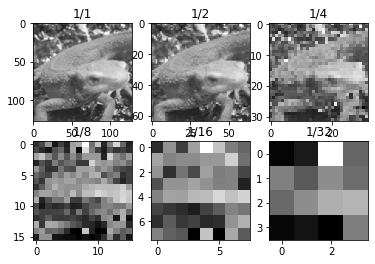

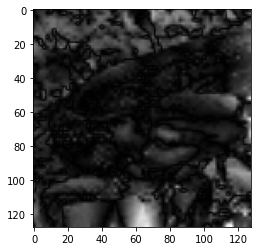

In [28]:
input_img = cv2.imread("../imori.jpg")
solver = Solver()
output_img = solver.problem_76(input_img)
plt.imshow(output_img, cmap="gray")
plt.show()